# MNIST (dígitos) solución tradicional

__Integrantes:__

+ Nombre: Nicolas Biojo Bermeo
+ Nombre: David Erazo Ochoa

__Números asignados:__


## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado_

Durante la clase se le proporcionaran dos números para trabajar:
+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

**Evaluación del método**

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

```
Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente
```
_Para todos los números que le corresponden_

$ Precision = \frac{VP}{VP+FP}$


Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas

+ Prepare una presentación donde muestre los resultados
+ Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos


#### Paquetes

In [5]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [6]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [3]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

Se tienen en total: 1797 imágenes
[[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]


<Figure size 432x288 with 0 Axes>

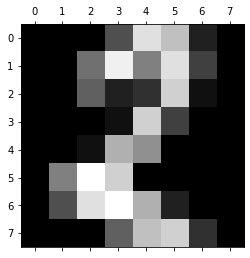

In [7]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[50]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[50]) # Ver su representación en pixeles

Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (_target_)

#### Solución

[[ 0.  0.  0.  0. 11. 12.  0.  0.]
 [ 0.  0.  0.  3. 15. 14.  0.  0.]
 [ 0.  0.  0. 11. 16. 11.  0.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]
 [ 0.  4. 16. 12. 16. 12.  0.  0.]
 [ 0.  3. 10.  3. 16. 11.  0.  0.]
 [ 0.  0.  0.  0. 16. 14.  0.  0.]
 [ 0.  0.  0.  0. 11. 11.  0.  0.]]
1


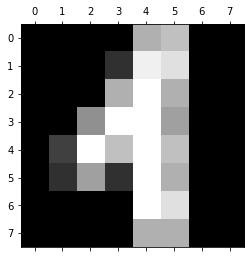

In [8]:
pl.matshow(digits.images[200]) # draw
print(digits.images[200]) # matrix
print(digits.target[200]) #real number

In [9]:
dta4 = [] #set of numbers 4
dta6 = [] #set of numbers 6

def targets(v,num): #function in which full a list with positions of determinate number
    for i in range(len(digits.images)):
        if(digits.target[i]==num):
            v.append(i)
            
targets(dta4,4)
targets(dta6,6)
            
print(dta4)
print()
print(dta6)

[4, 14, 24, 41, 64, 68, 87, 97, 100, 110, 111, 121, 124, 134, 144, 154, 171, 194, 198, 225, 228, 238, 239, 247, 250, 260, 270, 280, 297, 320, 324, 343, 353, 356, 366, 367, 377, 380, 390, 400, 410, 427, 450, 454, 473, 483, 486, 496, 497, 507, 510, 520, 530, 540, 557, 580, 584, 603, 613, 616, 626, 627, 637, 640, 650, 660, 670, 687, 710, 714, 733, 743, 746, 756, 757, 767, 770, 780, 790, 800, 817, 840, 844, 863, 873, 876, 886, 887, 897, 900, 909, 919, 929, 946, 966, 970, 988, 998, 1001, 1011, 1012, 1022, 1023, 1033, 1043, 1053, 1070, 1091, 1095, 1114, 1124, 1127, 1137, 1138, 1148, 1151, 1161, 1171, 1181, 1198, 1221, 1225, 1244, 1254, 1257, 1267, 1268, 1278, 1281, 1291, 1301, 1311, 1328, 1351, 1355, 1374, 1384, 1387, 1397, 1398, 1408, 1411, 1419, 1429, 1439, 1456, 1479, 1483, 1502, 1512, 1515, 1525, 1526, 1536, 1539, 1549, 1559, 1567, 1584, 1607, 1611, 1628, 1638, 1641, 1651, 1652, 1660, 1661, 1671, 1681, 1691, 1708, 1731, 1735, 1754, 1764, 1767, 1777, 1778, 1788, 1791]

[6, 16, 26, 34, 58,

In [34]:
average = [ [0 for col in range(8)] for raw in range (8)]
minM = [ [16 for col in range(8)] for raw in range (8)]
maxM = [ [-1 for col in range(8)] for raw in range (8)]

def pop_matrix(dta): # function in which three types of matrix (average, min and max) are filled

    flag = True
    minimum = 16
    x = len(dta)
    
    for i in range(8):
        for j in range(8):
            count = 0;
            count1 = 0;
            for k in dta:
                average[i][j] += digits.images[k][i][j]
                if digits.images[k][i][j]==0:
                    count = count +1
                if digits.images[k][i][j]==1:
                    count1 = count1 +1
                if minM[i][j] > digits.images[k][i][j] and digits.images[k][i][j]>1:
                    minM[i][j] = int(digits.images[k][i][j])     
                if maxM[i][j] < digits.images[k][i][j]:
                    maxM[i][j] = int(digits.images[k][i][j])
            
            if(count >= (len(dta)*0.3)):
                minM[i][j] = 0
                
            if(count1 >= (len(dta)*0.3)):
                minM[i][j] = 1
            
    for i in range(8):
        for j in range(8):
            average[i][j] = int(average[i][j]/len(dta))


In [35]:
def compare(image): # function that compares a number with the previous matrices
    for i in range(8):
        for j in range(8):
            dispersionMax = maxM[i][j] - average[i][j]
            dispersionMin = average[i][j] - minM[i][j]
            
            if image[i][j]>(average[i][j]+dispersionMax) or image[i][j]<(minM[i][j]-dispersionMin):
                return "No"
    return "yes"

In [36]:
pop_matrix(dta4)

for i in range(8):
            print (minM[i])
print()
for i in range(8):
            print (maxM[i]) 
print()
for i in range(8):
            print (average[i]) 

[0, 0, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 3, 2, 0, 0, 0]
[0, 0, 2, 2, 2, 2, 0, 0]
[0, 2, 2, 2, 2, 2, 2, 0]
[0, 2, 4, 2, 2, 4, 2, 0]
[0, 2, 2, 3, 3, 2, 0, 0]
[0, 0, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 2, 2, 0, 0, 0]

[0, 0, 11, 16, 16, 15, 11, 14]
[0, 5, 16, 16, 16, 16, 16, 11]
[0, 14, 16, 16, 16, 16, 16, 8]
[1, 15, 16, 16, 16, 16, 15, 1]
[0, 14, 16, 16, 16, 16, 12, 0]
[4, 16, 16, 16, 16, 16, 11, 0]
[8, 16, 16, 16, 16, 16, 1, 0]
[0, 3, 13, 16, 16, 12, 0, 0]

[0, 0, 0, 7, 11, 2, 0, 0]
[0, 0, 3, 13, 8, 2, 1, 0]
[0, 0, 10, 11, 4, 5, 3, 0]
[0, 4, 14, 6, 7, 10, 6, 0]
[0, 8, 14, 9, 13, 13, 5, 0]
[0, 6, 11, 12, 14, 10, 1, 0]
[0, 1, 2, 7, 13, 4, 0, 0]
[0, 0, 0, 7, 11, 1, 0, 0]


In [37]:
for k in dta4:
    print (compare(digits.images[k]))

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
